## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


## Importing the datasets

In [2]:
df = pd.read_csv('iris.csv')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Displaying the basic statistics about data

In [3]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Displaying the information regarding the data type


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### Displaying the number of sample for each class

In [5]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

#### Checking for null values

In [6]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Data Visualization

#### Plotting the Histogram for the different features of flower

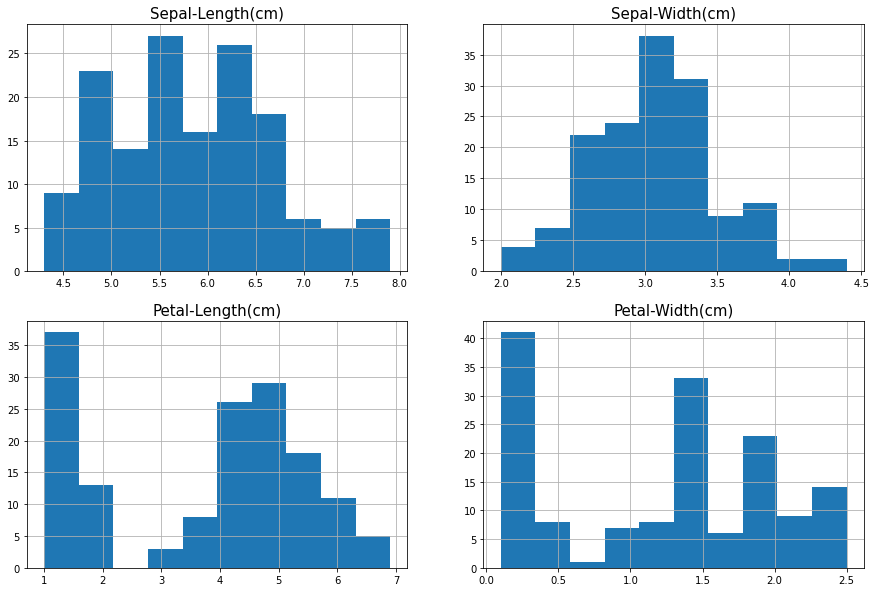

In [7]:
plt.subplots(figsize=(15, 10))

plt.subplot(2,2,1)
plt.title('Sepal-Length(cm)',fontsize=15)
plt.hist(df['SepalLengthCm'])
plt.grid()

plt.subplot(2,2,2)
plt.title('Sepal-Width(cm)', fontsize=15)
plt.hist(df['SepalWidthCm'])
plt.grid()

plt.subplot(2,2,3)
plt.title('Petal-Length(cm)', fontsize=15)
plt.hist(df['PetalLengthCm'])
plt.grid()

plt.subplot(2,2,4)
plt.title('Petal-Width(cm)', fontsize=15)
plt.hist(df['PetalWidthCm'])
plt.grid()

#### Scatterplot for the different features of flower

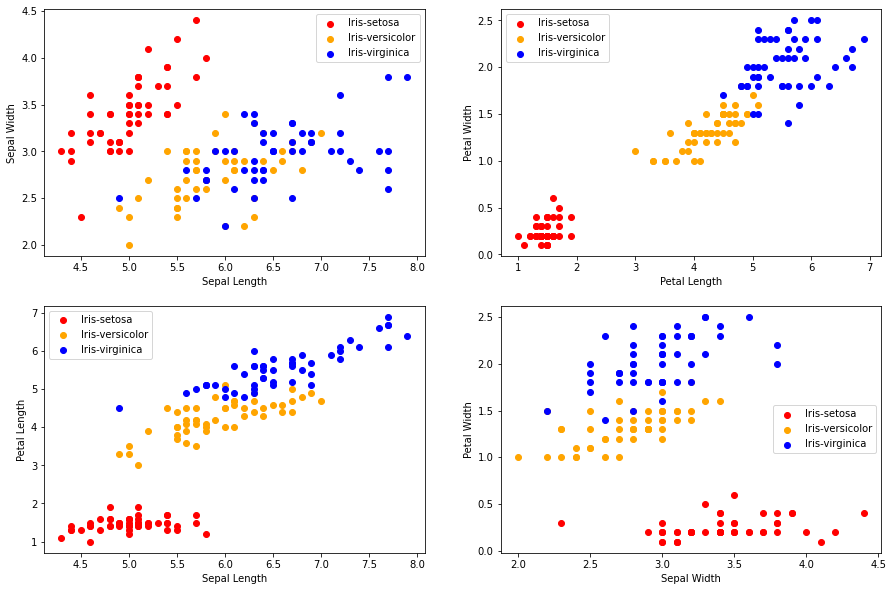

In [8]:
colors = ['red', 'orange', 'blue']
species = ['Iris-setosa','Iris-versicolor','Iris-virginica']
plt.subplots(figsize=(15,10))
plt.subplot(2,2,1)
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

plt.subplot(2,2,2)
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

plt.subplot(2,2,3)
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

plt.subplot(2,2,4)
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

#### Label Encoder for encoding the Species column


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Encoded_Species']= le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Encoded_Species
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


## Splitting the Datasets into the Training set and Test set

In [10]:

from sklearn.model_selection import train_test_split
X=df.drop(columns=['Species','Encoded_Species'])
Y=df['Encoded_Species']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size = 0.2)

## Training the Logistic Regression Model

In [11]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Predicting the Test set results

In [12]:
pred = model.predict(x_test)

#### Accuracy of the Linear Regression Model

In [13]:
accuracy = accuracy_score(y_test,pred)*100
print("Accuracy:",accuracy)

Accuracy: 93.33333333333333


#### Confusion matrix and classification report

In [14]:
cm = confusion_matrix(y_test,pred)
print("Consfusion Matrix\n",cm)
print("\nClassification Report \n", classification_report(y_test, pred))

Consfusion Matrix
 [[ 9  0  0]
 [ 0 10  1]
 [ 0  1  9]]

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.91      0.91      0.91        11
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



## Training the Decision Tree Classifier Model

In [15]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as Tree
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 2)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

#### Predicting the Test set results

In [16]:
pred = model.predict(x_test)

#### Accuracy of the Decision Tree Classifier Model

In [17]:
accuracy = accuracy_score(y_test,pred)*100
print("Accuracy:",accuracy)

Accuracy: 76.66666666666667


#### Confusion matrix and classification report

In [18]:
cm = confusion_matrix(y_test,pred)
print("Consfusion Matrix\n",cm)
print("\nClassification Report \n", classification_report(y_test, pred))

Consfusion Matrix
 [[ 9  0  0]
 [ 0 10  1]
 [ 0  6  4]]

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.62      0.91      0.74        11
           2       0.80      0.40      0.53        10

    accuracy                           0.77        30
   macro avg       0.81      0.77      0.76        30
weighted avg       0.80      0.77      0.75        30



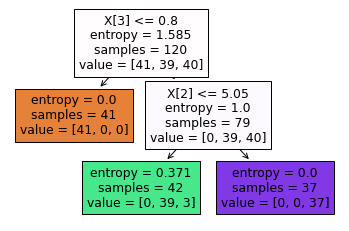

In [19]:
Tree.plot_tree(model, filled=True)
plt.show()

## Training the K Nearest Neighbors Model

In [20]:
#KNN model
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)

KNeighborsClassifier()

#### Predicting the Test set results

In [21]:
pred = model.predict(x_test)

#### Accuracy of the KNN model

In [22]:
accuracy = accuracy_score(y_test,pred)*100
print("Accuracy:",accuracy)

Accuracy: 96.66666666666667


#### Confusion matrix and classification report

In [23]:
cm = confusion_matrix(y_test,pred)
print("Consfusion Matrix\n",cm)
print("\nClassification Report \n", classification_report(y_test, pred))

Consfusion Matrix
 [[ 9  0  0]
 [ 0 10  1]
 [ 0  0 10]]

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.91      0.95        11
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



## Training the Support Vector Machine Model

In [24]:
#SVM model
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)

SVC()

#### Predicting the Test set results

In [25]:
pred = model.predict(x_test)

#### Accuracy of the KNN model

In [26]:
accuracy = accuracy_score(y_test,pred)*100
print("Accuracy:",accuracy)

Accuracy: 90.0


#### Confusion matrix and classification report

In [27]:
cm = confusion_matrix(y_test,pred)
print("Consfusion Matrix\n",cm)
print("\nClassification Report \n", classification_report(y_test, pred))

Consfusion Matrix
 [[ 9  0  0]
 [ 0 10  1]
 [ 0  2  8]]

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.83      0.91      0.87        11
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.91      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

